In [37]:
import os
import json
import numpy as np
import pandas as pd

{
    "scale_bar_found": true,
    "bbox": [821, 944, 930, 959],
    "measured_scale_length": 109.0,
    "declared_scale_length": "300.0",
    "units": "\u03bcm",
    "pixel_to_mm_ratio": 0.0002833333333333333,
    "orientation": "lateral"
}

[
    {
        ""x"":86.56648092339245,
        ""y"":92.66337220851715,
        ""width"":4.667154164922479,
        ""height"":1.9219417025669543,
        ""rotation"":0,
        ""rectanglelabels"":[""label""],
        ""original_width"":1024,""original_height"":768
    },
    {
        ""x"":83.78904078004877,
        ""y"":94.73766294848271,
        ""width"":10.573609153298904,
        ""height"":0.4453279554728198,
        ""rotation"":0,
        ""rectanglelabels"":[""bar""],
        ""original_width"":1024,
        ""original_height"":768
    }
]

In [38]:
# Load ground_truth_annotations.csv
ground_truth = pd.read_csv('data/ground_truth_annotations.csv', usecols=['image', 'label', 'unit', 'value'])

# Extract image names
ground_truth['image'] = ground_truth['image'].apply(lambda x: x.split('/')[-1].replace('.jpg', ''))
ground_truth.set_index('image', inplace=True)

# Get approximate bar size
def get_bar_size(row):
    if pd.isnull(row['label']):
        return None
    for item in np.array(eval(row['label'])):
        if item['rectanglelabels'] == ['bar']:
            if item['width'] > item['height']:
                return item['width'] * item['original_width'] / 100
            else:
                return item['height'] * item['original_height'] / 100
    return None
ground_truth['bar_size'] = ground_truth.apply(get_bar_size, axis=1)

def get_bbox(row):
    if pd.isnull(row['label']):
        return None
    for item in np.array(eval(row['label'])):
        if item['rectanglelabels'] == ['bar']:
            return item['x'], item['y'], item['width'], item['height']
    return None
ground_truth['bbox_true'] = ground_truth.apply(get_bbox, axis=1)

# Load predictions
dfs = []
for filename in os.listdir('outputs_vlm/'):
    if filename.endswith('.json'):
        with open(os.path.join('outputs_vlm/', filename), 'r') as f:
            # Transform string to dict
            data = json.load(f)
            try:
                data = json.loads(data)
                df = pd.json_normalize(data)
            except:
                df = pd.DataFrame(data)
            df['image'] = filename.removesuffix('.json')
            dfs.append(df)

try:
    predictions = pd.concat(dfs, ignore_index=True).set_index('image')
except ValueError:
    display(dfs)

/var/folders/k4/f_bpyr193w1dyd_9bdnnr3pc0000gn/T/ipykernel_52029/4012704293.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions = pd.concat(dfs, ignore_index=True).set_index('image')


In [39]:
predictions

,scale_bar_found,bbox,measured_scale_length,declared_scale_length,units,pixel_to_mm_ratio,orientation
image,,,,,,,
BIOUG82306-C05.e4415a40,True,873.0,113.0,500,μm,1000.0,Dorsal
BIOUG82306-C05.e4415a40,True,945.0,113.0,500,μm,1000.0,Dorsal
BIOUG82306-C05.e4415a40,True,988.0,113.0,500,μm,1000.0,Dorsal
BIOUG82306-C05.e4415a40,True,984.0,113.0,500,μm,1000.0,Dorsal
CBG-A17881-C02.9788be17,True,829.0,152.0,1,mm,152.0,Lateral
...,...,...,...,...,...,...,...
BIOUG86777-G04.ebdc7e93,True,951.0,100.0,650,μm,1000.0,Dorsal
BIOUG99538-F10.eefdaa9a,True,47.0,37.0,2 mm,mm,18.5,Dorsal
BIOUG99538-F10.eefdaa9a,True,927.0,37.0,2 mm,mm,18.5,Dorsal


In [40]:
predictions.describe(include='all')

,scale_bar_found,bbox,measured_scale_length,declared_scale_length,units,pixel_to_mm_ratio,orientation
count,604,604.000000,604.000000,604,604,604.000000,604
unique,1,NaN,NaN,28,3,NaN,6
top,True,NaN,NaN,500,μm,NaN,Dorsal
freq,604,NaN,NaN,140,396,NaN,384
mean,NaN,899.528146,80.079470,NaN,NaN,13249.624774,NaN
std,NaN,187.551141,58.943324,NaN,NaN,65597.922823,NaN
min,NaN,6.000000,7.000000,NaN,NaN,0.000450,NaN
25%,NaN,897.000000,22.000000,NaN,NaN,43.500000,NaN
50%,NaN,952.000000,100.000000,NaN,NaN,500.000000,NaN
75%,NaN,985.000000,113.000000,NaN,NaN,1000.000000,NaN


In [41]:
# Merge ground truth and predictions
merged = pd.merge(ground_truth, predictions, left_index=True, right_index=True, how='outer')

In [42]:
merged[merged['scale_bar_found'].isnull()]

,label,unit,value,bar_size,bbox_true,scale_bar_found,bbox,measured_scale_length,declared_scale_length,units,pixel_to_mm_ratio,orientation
image,,,,,,,,,,,,
BIOUG38212-G08.e7951709,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOUG51518-D10.aa1135bd,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOUG52793-A01.07798c22,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOUG53663-A08.895956f4,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BIOUG53801-A04.42b4d0e0,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
CBG-A18331-D12.abfe7187,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBG-A18335-F12.77056cee,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBG-A18352-C05.5bb0bd2c,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
merged[(merged['unit'] == 'um') & (merged['units'] == 'μm')]['units'] = 'um'

/var/folders/k4/f_bpyr193w1dyd_9bdnnr3pc0000gn/T/ipykernel_52029/1842785180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged[(merged['unit'] == 'um') & (merged['units'] == 'μm')]['units'] = 'um'


In [44]:
# Replace all μm with um in 'units' column
merged['units'] = merged['units'].replace('μm', 'um')
# In declared_scale_length, remove all non-numeric characters and convert to float
merged['declared_scale_length'] = merged['declared_scale_length'].str.replace(r'[^0-9.]', '', regex=True).astype(float)
# Measure bar size (from)


In [45]:
# Compare ground truth and predictions
detection = merged.dropna(subset=['scale_bar_found']).copy()
recognition = detection[detection['label'].notnull()]

results = {
    'total_images': len(detection),
    'correct_detections': (detection['scale_bar_found'] == detection['label'].notnull()).mean(),
    'correct_labels_values': (recognition['declared_scale_length'] == recognition['value']).mean(),
    'correct_labels_units': (recognition['units'] == recognition['unit']).mean(),
    'correct_labels' : ((recognition['declared_scale_length'] == recognition['value']) & (recognition['units'] == recognition['unit'])).mean(),
    'correct_bar_sizes' : (np.abs(recognition['measured_scale_length'] - recognition['bar_size']) / recognition['bar_size'] <= 0.1).mean(),
    #'bbox_width_error': np.mean([
    #    abs((pred[2] - true[2]) * recognition.loc[idx, 'original_width'] / 100)
    #    for idx, (pred, true) in recognition[['bbox', 'bbox_true']].iterrows()
    #    if pred is not None and true is not None
    #]),
}
results

{'total_images': 604,
 'correct_detections': 1.0,
 'correct_labels_values': 0.8675496688741722,
 'correct_labels_units': 1.0,
 'correct_labels': 0.8675496688741722,
 'correct_bar_sizes': 0.033112582781456956}

In [46]:
merged

,label,unit,value,bar_size,bbox_true,scale_bar_found,bbox,measured_scale_length,declared_scale_length,units,pixel_to_mm_ratio,orientation
image,,,,,,,,,,,,
BIOUG38212-G08.6c717ec2,"[{""x"":86.01861177693473,""y"":93.04564077899184,...",um,300.0,298.033104,"(82.57311489636689, 94.78819092548592, 10.3483...",True,822.0,103.0,300.0,um,300.0,Lateral
BIOUG38212-G08.6c717ec2,"[{""x"":86.01861177693473,""y"":93.04564077899184,...",um,300.0,298.033104,"(82.57311489636689, 94.78819092548592, 10.3483...",True,927.0,103.0,300.0,um,300.0,Lateral
BIOUG38212-G08.6c717ec2,"[{""x"":86.01861177693473,""y"":93.04564077899184,...",um,300.0,298.033104,"(82.57311489636689, 94.78819092548592, 10.3483...",True,930.0,103.0,300.0,um,300.0,Lateral
BIOUG38212-G08.6c717ec2,"[{""x"":86.01861177693473,""y"":93.04564077899184,...",um,300.0,298.033104,"(82.57311489636689, 94.78819092548592, 10.3483...",True,960.0,103.0,300.0,um,300.0,Lateral
BIOUG38212-G08.e7951709,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
caos-cloud.linode-us-east.16_293.37b8f000-9116-44d5-815e-7ac08ed1bd93,"[{""x"":86.6031492710147,""y"":95.3695035579216,""w...",mm,1.0,480.679004,"(78.17429735402813, 97.22914068325427, 20.0952...",True,779.0,211.0,NaN,mm,211.0,Dorsal
caos-cloud.linode-us-east.16_293.37b8f000-9116-44d5-815e-7ac08ed1bd93,"[{""x"":86.6031492710147,""y"":95.3695035579216,""w...",mm,1.0,480.679004,"(78.17429735402813, 97.22914068325427, 20.0952...",True,953.0,211.0,NaN,mm,211.0,Dorsal
caos-cloud.linode-us-east.16_293.37b8f000-9116-44d5-815e-7ac08ed1bd93,"[{""x"":86.6031492710147,""y"":95.3695035579216,""w...",mm,1.0,480.679004,"(78.17429735402813, 97.22914068325427, 20.0952...",True,984.0,211.0,NaN,mm,211.0,Dorsal


In [47]:
detection

,label,unit,value,bar_size,bbox_true,scale_bar_found,bbox,measured_scale_length,declared_scale_length,units,pixel_to_mm_ratio,orientation
image,,,,,,,,,,,,
BIOUG38212-G08.6c717ec2,"[{""x"":86.01861177693473,""y"":93.04564077899184,...",um,300.0,298.033104,"(82.57311489636689, 94.78819092548592, 10.3483...",True,822.0,103.0,300.0,um,300.0,Lateral
BIOUG38212-G08.6c717ec2,"[{""x"":86.01861177693473,""y"":93.04564077899184,...",um,300.0,298.033104,"(82.57311489636689, 94.78819092548592, 10.3483...",True,927.0,103.0,300.0,um,300.0,Lateral
BIOUG38212-G08.6c717ec2,"[{""x"":86.01861177693473,""y"":93.04564077899184,...",um,300.0,298.033104,"(82.57311489636689, 94.78819092548592, 10.3483...",True,930.0,103.0,300.0,um,300.0,Lateral
BIOUG38212-G08.6c717ec2,"[{""x"":86.01861177693473,""y"":93.04564077899184,...",um,300.0,298.033104,"(82.57311489636689, 94.78819092548592, 10.3483...",True,960.0,103.0,300.0,um,300.0,Lateral
BIOUG51518-D10.d16c5af6,"[{""x"":90.10686418600262,""y"":94.47673862601131,...",um,500.0,248.134142,"(87.88131475001308, 97.46579772252284, 10.6404...",True,874.0,101.0,NaN,um,1010.0,Dorsal
...,...,...,...,...,...,...,...,...,...,...,...,...
caos-cloud.linode-us-east.16_237.1606d0ef-66ab-4038-959d-5dbc39ea16da,"[{""x"":93.95491730849064,""y"":96.37086196973293,...",um,500.0,504.242704,"(92.50274660606101, 97.991816921217, 6.7948080...",True,994.0,12.0,500.0,um,1000.0,Lateral
caos-cloud.linode-us-east.16_293.37b8f000-9116-44d5-815e-7ac08ed1bd93,"[{""x"":86.6031492710147,""y"":95.3695035579216,""w...",mm,1.0,480.679004,"(78.17429735402813, 97.22914068325427, 20.0952...",True,779.0,211.0,NaN,mm,211.0,Dorsal
caos-cloud.linode-us-east.16_293.37b8f000-9116-44d5-815e-7ac08ed1bd93,"[{""x"":86.6031492710147,""y"":95.3695035579216,""w...",mm,1.0,480.679004,"(78.17429735402813, 97.22914068325427, 20.0952...",True,953.0,211.0,NaN,mm,211.0,Dorsal


Number of error cases: 4 out of 604
Image: BIOUG85754-A12.3b8e9942, Scale Bar Found: True, Label Present: True
Image file for BIOUG85754-A12.3b8e9942 not found.
Image file for BIOUG85754-A12.3b8e9942 not found.
Image file for BIOUG85754-A12.3b8e9942 not found.


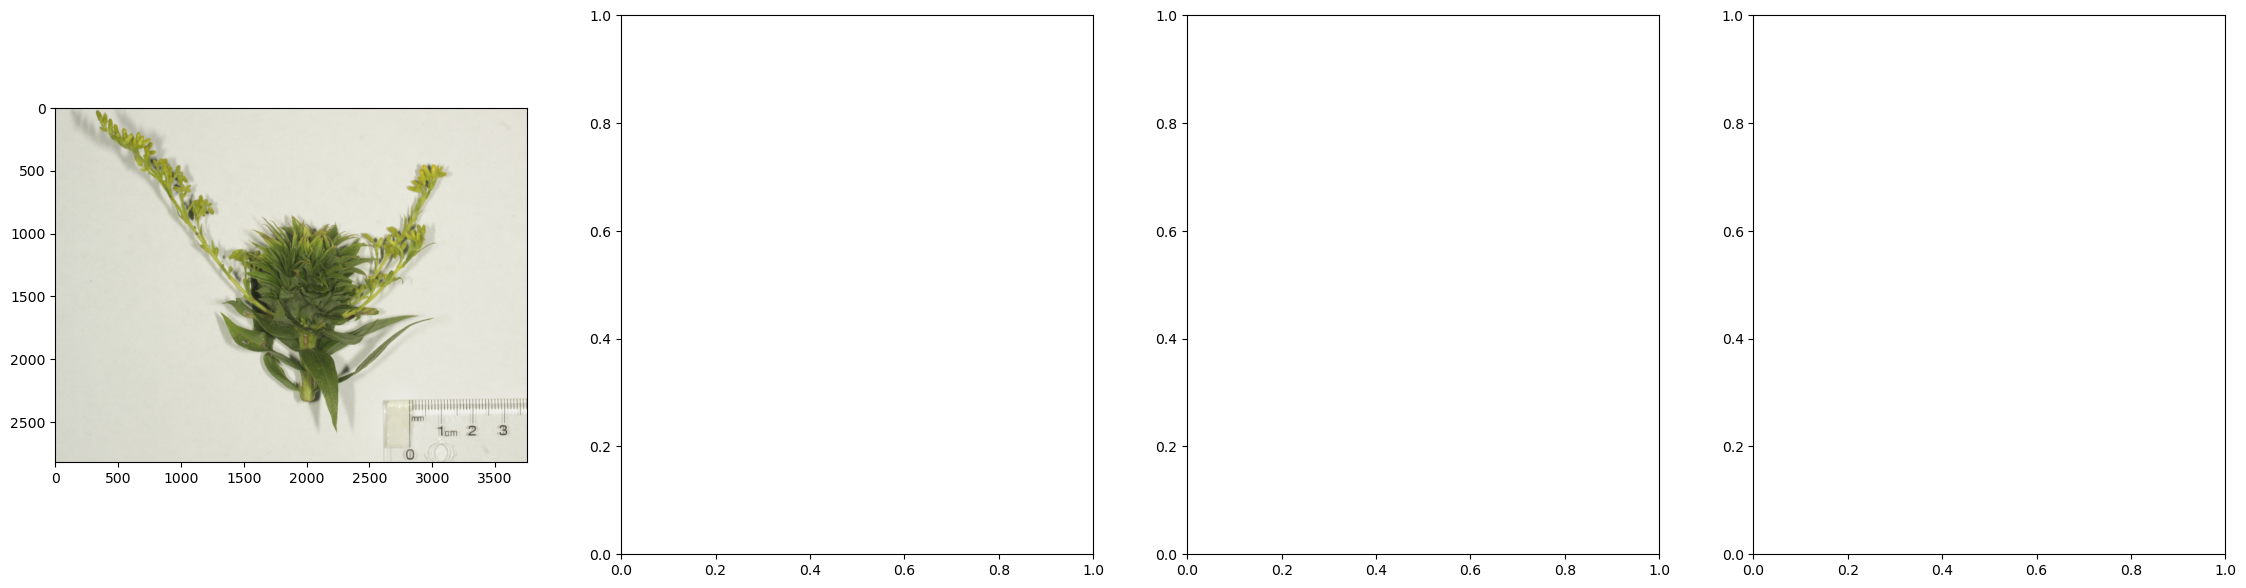

Image: BIOUG85754-A12.3b8e9942, Scale Bar Found: True, Label Present: True
Image file for BIOUG85754-A12.3b8e9942 not found.
Image file for BIOUG85754-A12.3b8e9942 not found.
Image file for BIOUG85754-A12.3b8e9942 not found.


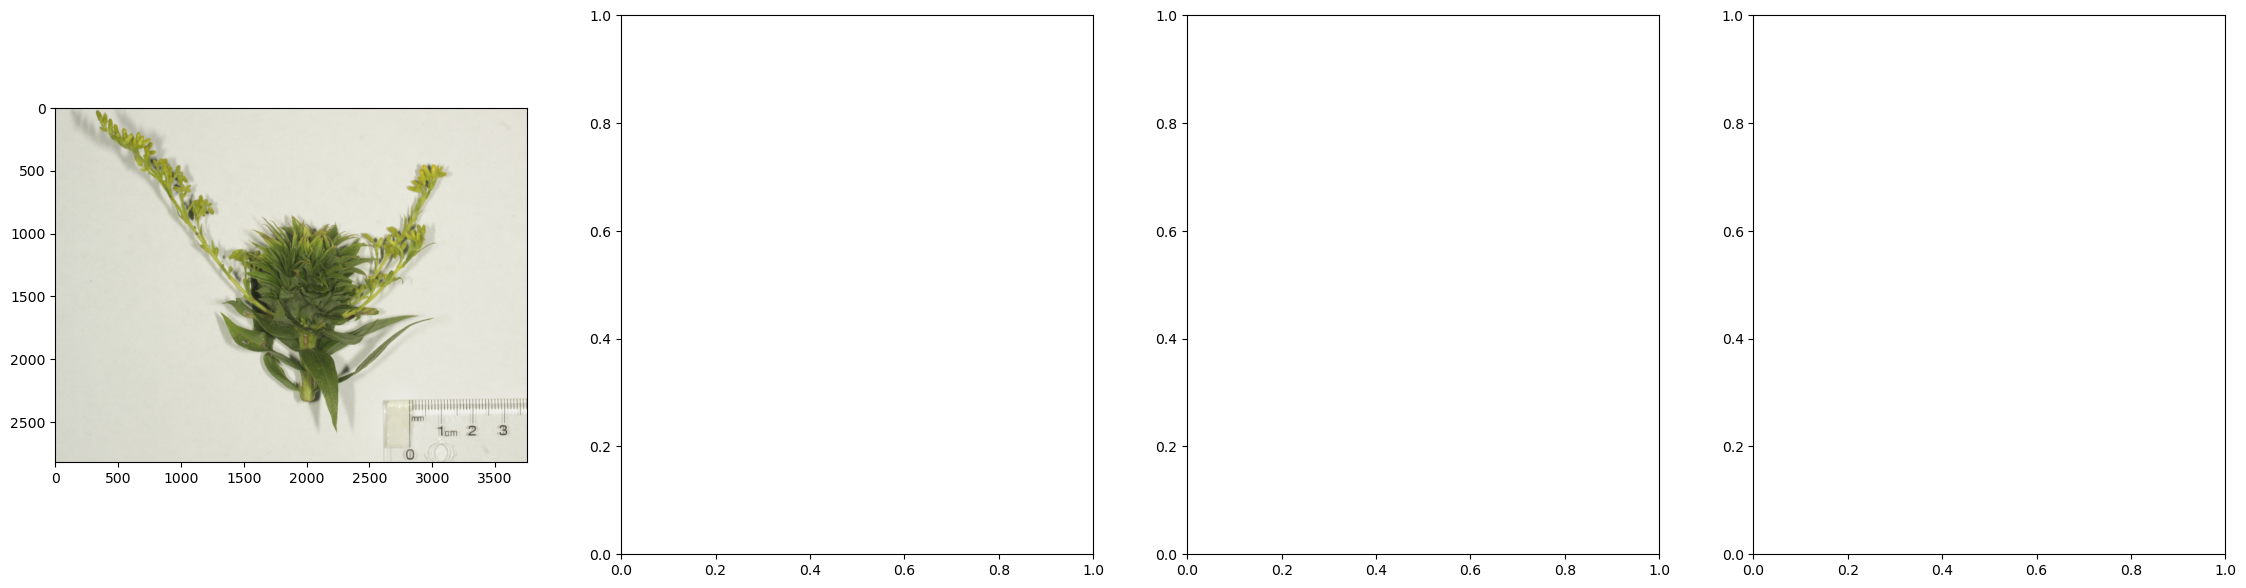

Image: BIOUG85754-A12.3b8e9942, Scale Bar Found: True, Label Present: True
Image file for BIOUG85754-A12.3b8e9942 not found.
Image file for BIOUG85754-A12.3b8e9942 not found.
Image file for BIOUG85754-A12.3b8e9942 not found.


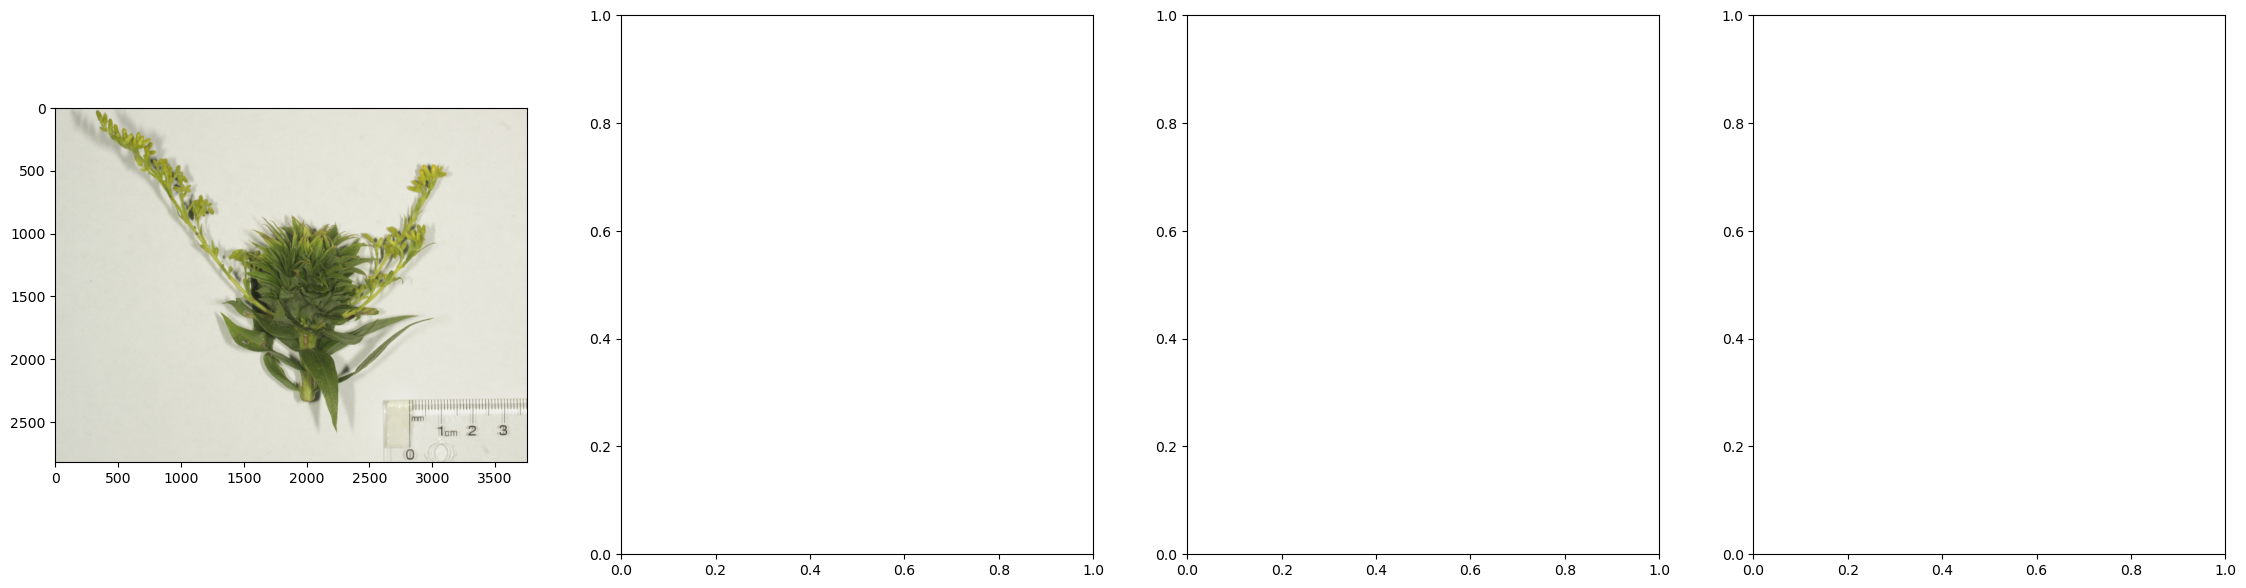

Image: BIOUG85754-A12.3b8e9942, Scale Bar Found: True, Label Present: True
Image file for BIOUG85754-A12.3b8e9942 not found.
Image file for BIOUG85754-A12.3b8e9942 not found.
Image file for BIOUG85754-A12.3b8e9942 not found.


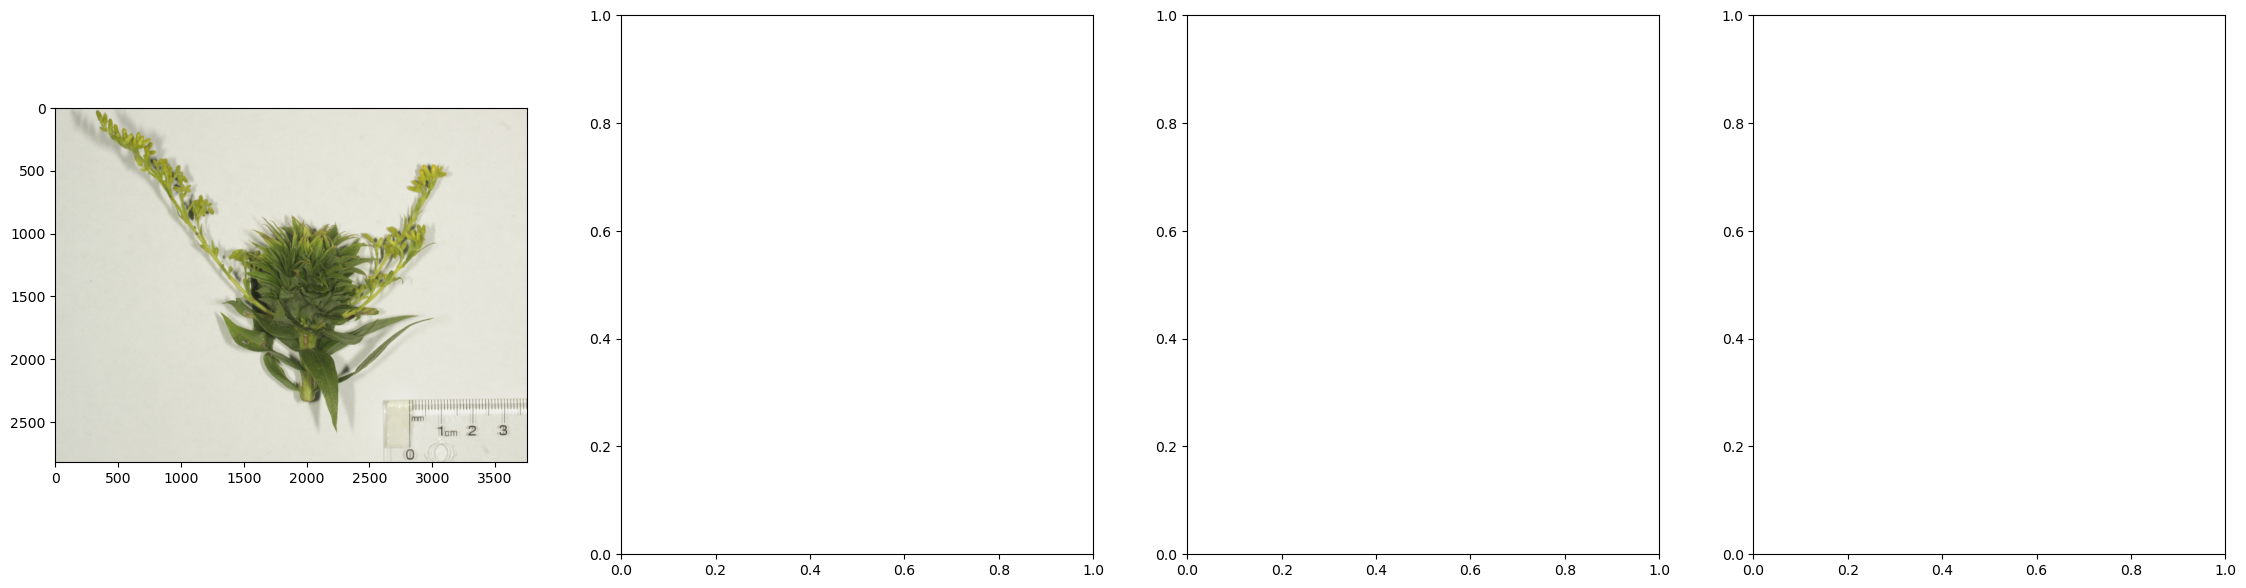

In [ ]:
import matplotlib.pyplot as plt
# Error analysis
errors = (
    (detection['scale_bar_found'] != detection['label'].notnull()) |
    ((detection['declared_scale_length'] != detection['value']) & (detection['declared_scale_length'].notnull())) |
    ((detection['units'] != detection['unit']) & (detection['units'].notnull())) #|
    #(np.abs(recognition['measured_scale_length'] - recognition['bar_size']) / recognition['bar_size'] > 0.07)
)
print(f"Number of error cases: {errors.sum()} out of {len(detection)}")

# Visualize errors
error_cases = detection[errors]
for idx, row in error_cases.iterrows():
    print(f"Image: {idx}, Scale Bar Found: {row['scale_bar_found']}, Label Present: {row['label'] is not None}")
    # Load and display image if needed
    try:
        plt.figure(figsize=(28, 7))
        plt.subplot(1, 4, 1)
        plt.imshow(plt.imread(f"data/annot/{idx}.jpg"))
    except FileNotFoundError: pass
    try:
        plt.subplot(1, 4, 2)
        plt.imshow(plt.imread(f"outputs/{idx}_yolo.jpg"))
    except FileNotFoundError: pass
    try:
        plt.subplot(1, 4, 3)
        plt.imshow(plt.imread(f"outputs/{idx}_ocr.png"))
    except FileNotFoundError: pass
    try:
        plt.subplot(1, 4, 4)
        plt.imshow(plt.imread(f"outputs/{idx}_scalebar.png"))
    except FileNotFoundError: pass
    plt.show()

In [ ]:
# Copy images in error_cases `image` column from the annot folder to a separate error_analysis folder for further inspection
import shutil
os.makedirs('error_analysis', exist_ok=True)
for idx in error_cases.index:
    try:
        shutil.copy(f"data/annot/{idx}.jpg", f"error_analysis/{idx}.jpg")
    except FileNotFoundError:
        print(f"Image file for {idx} not found, cannot copy.")

In [ ]:
!for img in error_analysis/*; do python src/scaledetection.py --image "$img" --plot_debug --output_dir "error_analysis_out"; done

/opt/miniconda3/envs/scale/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/Users/emmaboehly/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/Users/emmaboehly/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.
No text labels detected.
/opt/miniconda3/envs/scale/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. Yo